## Практическое занятие 1
## Математический анализ

https://docs.sympy.org/latest/tutorial/intro.html

In [1]:
#Вначале для простоты будем подключать модуль sympy целиком
from sympy import *

### Функции пользователя
#### Задание 1
Описать функцию $f(x,n)=x(x+1)...(x+n-1)(x+n)$, $n>0$, вычислить  $f(3,5)$, $f(x,4)$, $f(y + z,1)$.      

In [3]:
def f(x, n):
  res = 1;
  for i in range(0, n + 1):
    res *= (x + i)
  return(res)

def parse_symbols(s):
  s = s.replace(" ", "").replace("-", " - ").replace("+", " + ").replace("*", " * ").replace("/", " / ")
  if (s[0] == ' '):
    s = "0" + s
  s = s.split(' ')
  for i in range(len(s) - 1):
    if (s[i] != '+' and s[i] != '/' and s[i] != '*' and s[i] != '-' and s[i + 1] != '+' and s[i + 1] != '/' and s[i + 1] != '*' and s[i + 1] != '-'):
      s[i] += s[i + 1]
      s.pop(i + 1)
  for i in range(len(s)):
    if (s[i] != '+' and s[i] != '/' and s[i] != '-' and s[i] != '*'):
      if (s[i].isnumeric()):
        s[i] = int(s[i])
      else:
        s[i] = Symbol(s[i])
  i = 0
  while (i < len(s)):
    if (s[i] == '*'):
      s[i - 1] = s[i - 1] * s[i + 1]
    if (s[i] == '/'):
      s[i - 1] = s[i - 1] / s[i + 1]
    if (s[i] == '*' or s[i] == '/'):
      s.pop(i)
      s.pop(i)
      i = i - 1
    i = i + 1
  i = 0
  while (i < len(s)):
    if (s[i] == '+'):
      s[i - 1] = s[i - 1] + s[i + 1]
    if (s[i] == '-'):
      s[i - 1] = s[i - 1] - s[i + 1]
    if (s[i] == '+' or s[i] == '-'):
      s.pop(i)
      s.pop(i)
      i = i - 1
    i = i + 1
  return(s[0])

try:
  inputs = int(input("Введите количество входных данных:")) #3
except:
  print("\033[91mВведённые данные некорректны")
  sys.exit(0)

for i in range(inputs):
  display(f(parse_symbols(input("x = ")), parse_symbols(input("n = "))))

#3  5
#x  4
#y + z  1

Введите количество входных данных:3
x = 3
n = 5


20160

x = x
n = 4


x*(x + 1)*(x + 2)*(x + 3)*(x + 4)

x = y + z
n = 1


(y + z)*(y + z + 1)

#### Задание 2
Описать функцию $right\_ratio(f, x, delta\_x)$, вычисляющую правое разностное отношение функции $f$ в точке $x$ при $\Delta x$, т.е. $\frac{f(x+\Delta x)-f(x)}{\Delta x}$. 

Аргумент $ delta\_x$ по умолчанию равен 1.

Вычислить правое разностное отношение $\sin$ в точке $\frac{\pi}{4}$ со значением $\Delta x$ равным  $\frac{\pi}{6}$ 

и правое разностное отношение $e^x$ при $x=3$ со значением $\Delta x$  по умолчанию. Для вычисления $e^x$ воспользоваться функцией Sympy $\exp(x)$.

In [4]:
def right_ratio(f, x, delta_x = 1):
  return((f(x + delta_x) - f(x)) / delta_x)
  
display(right_ratio(sin, pi / 4, pi / 6))
display(right_ratio(exp, 3))

6*(-sqrt(2)/4 + sqrt(6)/4)/pi

-exp(3) + exp(4)

#### Задание 3
Опиcать функцию $square\_roots$, возвращающую корни квадратного уравнения $a x^2 + bx + c = 0$  с вещественными аргументами $a\neq 0$, b, c и  необязательным параметром $is\_real$, по умолчанию равным $True$. Функция возвращает список корней уравнения. Если корни комплексные, а $is\_real=True$, то функция возвращает пустой список. Если корень один, то в списке корней он тоже должен быть один.

Решить уравнения в вещественных числах:

а) $3x^2+8x+4=0$, 

б) $x^2-4x+4=0$

в) $2x^2+x+1=0$

Уравнение в) решить отдельно в комплексных числах.

Для красивого представления комплексных чисел можно воспользоваться функцией display.

Если элементы списка нужно выводить в столбик, можно воспользоваться display(\*имя_списка) (\* в данном случае служебный символ)

In [5]:
def square_roots(a, b, c, is_real = True):
  D = b * b - 4 * a * c
  if (is_real and D < 0): 
    return([])
  if (D == 0): 
    return([-b / (2 * a)])
  return([(-b + sqrt(D)) / (2 * a), (-b - sqrt(D)) / (2 * a)])

def output(roots):
  if (len(roots) == 0):
    print("Действительных корней нет")
  if (len(roots) == 1):
    print(f"""Действительные корни: {Symbol('x1')} = {Symbol('x2')} = {roots[0]}""")
  if (len(roots) == 2):
    display(*roots)


try:
  inputs = int(input("Введите количество входных данных:")) #4
except:
  print("\033[91mВведённые данные некорректны")
  sys.exit(0)
for i in range(inputs):
  print(f"""\033[95m{i + 1})\033[0m """)
  try:
    a = int(input('a: '))
    b = int(input('b: '))
    c = int(input('c: '))
    d = int(input('Вывод комплексных решений (0 или 1): '))
  except:
    print("\033[91mВведённые данные некорректны")
    sys.exit(0)
  if (d == 0):
    output(square_roots(a, b, c))
  else: 
    output(square_roots(a, b, c, False))
  
#3 8 4 0
#1 -4 4 0
#2 1 1 0
#2 1 1 1

Введите количество входных данных:4
1) 
a: 3
b: 8
c: 4
Вывод комплексных решений (0 или 1): 0


-2/3

-2

2) 
a: 1
b: -4
c: 4
Вывод комплексных решений (0 или 1): 0
Действительные корни: x1 = x2 = 2.0
3) 
a: 2
b: 1
c: 1
Вывод комплексных решений (0 или 1): 0
Действительных корней нет
4) 
a: 2
b: 1
c: 1
Вывод комплексных решений (0 или 1): 1


-1/4 + sqrt(7)*I/4

-1/4 - sqrt(7)*I/4

#### Задание 4
Описать функцию $check\_eq(root\_list, eq)$, проверяющую, что $x=root$ является решением уравнения $eq(x)=0$ для всех элементов списка root_list. Функция возвращает True, если все элементы списка являются корнями, если же хотя бы один не является, то результат False. В случае, если список пустой, $check\_eq$ возвращает False. Обойтись только изученными на этом занятии средствами!

С помощью $check\_eq$ проверить, что $\left[\frac{\pi}{3}, \frac{2\pi}{3}, \frac{7\pi}{3}\right]$ являются корнями уравнения $\sin(x)-\frac{\sqrt{3}}2=0$.

##### Указание
Описать функцию $eq\_sin(x) = \sin(x)-\frac{\sqrt{3}}2$.

В цикле $for$ в роли счетчика можно использовать сами элементы списка, например так: 

In [6]:
my_list = [3, 'a', sin(pi/3)]
for item in my_list:
    display(item)

3

'a'

sqrt(3)/2

In [7]:
def check_eq(root_list, eq):
  if (len(root_list) == 0):
    return(False)
  for item in root_list:
    if (eq(item) != 0):
      return(False)
  return(True)

def eq_sin(x):
  return(sin(x) - sqrt(3) / 2)

display(check_eq([pi / 3, 2 * pi / 3, 7 * pi / 3], eq_sin))

True

#### Задание 5
Описать функцию $less\_c(my\_list,c)$, возвращающую первый попавшийся элемент списка $my\_list$, меньший $c$, и его номер в списке. Если таких элементов нет, возвращается ($None, None$).

Вызвать функцию $less\_c(my\_list,c)$ со списком $my\_list = [3, -2, 8]$ и $c = - 4$, затем с тем же списком, но $c = 1$.

С помощью этой функции найти четное натуральное число $n$ до 100 (включительно), такое что $\sin n <\frac12$, построив предварительно список $list\_sin$ синусов четных натуральных чисел (строить список с помощью for и range). 

In [10]:
def less_c(my_list, c):
  for i in range(len(my_list)):
    if (my_list[i] < c):
      return((my_list[i], i));
  return((None, None))

display(less_c([3, -2, 8], -4))
display(less_c([3, -2, 8], 1))

list_sin = [sin(x) for x in range(2, 102, 2)]
display(less_c(list_sin, 1/2)[1] * 2 + 2)

(None, None)

(-2, 1)

4

### Индивидуальное задание
Вычислить значение функции $f$ с точностью до сотых в точках из списка $X$.
#### Указание. 
Воспользуйтесь методом evalf() для получения приближенного значения. Значения $f$ в точках из списка $X$ выведите в виде списка.

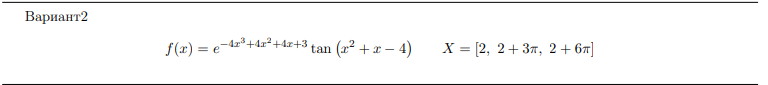

In [11]:
def log10 (x):
  return(log(x) / log(10))

def custom_round (x):
  power = round(log10(abs(x)).evalf())
  x *= (10 ** (-power))
  return((x.round(2), power))

def f(x):
  exp_terms = [
      -4 * (x ** 3),
      4 * (x ** 2),
      4 * x,
      3
  ]
  tan_terms = [
    x ** 2,
    x,
    -4
  ]
  return(exp(sum(exp_terms)) * tan(sum(tan_terms)))

In [12]:
x_list = [2, 2 + 3 * pi, 2 + 6 * pi]
answers = []
for x in x_list:
  string = custom_round(f(x).evalf())
  string = f"""{string[0]}e{string[1]}"""
  answers.append(string)
print(*answers)

-1.47e-2 -0.68e-2343 -1.03e-14952


In [ ]:
def num_zeros(s):
  s = str(s)
  s = s.replace("-", "").replace(".", "")
  for i in range(len(s)):
    if (s[i] != '0'):
      return(i)
  return(0)

x_list = [2, 2 + 3 * pi, 2 + 6 * pi]
answers = []
for x in x_list:
  answers.append(f(x).evalf(3 - num_zeros(f(x).evalf())))
display(*answers)

-0.01

-6.76e-2344

-1.03e-14952